In [22]:
%reload_ext autoreload
%autoreload 2
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'module'))
import wiki
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

### Load networks, stats

In [10]:
import pickle
comm, df, df_expand = pickle.load(
    open('/Users/harangju/Developer/data/wiki/analysis/stats.pickle', 'rb'))

In [12]:
topics = ['anatomy']#, 'biochemistry', 'cognitive science', 'evolutionary biology',
#           'genetics', 'immunology', 'molecular biology', 'chemistry',
#           'biophysics', 'energy', 'optics', 'earth science', 'geology',
#           'meteorology', 'philosophy of language', 'philosophy of law', 
#           'philosophy of mind', 'philosophy of science', 'economics',
#           'accounting', 'education', 'linguistics', 'law', 'psychology', 'sociology',
#           'electronics', 'software engineering', 'robotics']#, 'physics']

In [13]:
path_saved = '/Users/harangju/Developer/data/wiki/graphs/dated/'
networks = {}
for topic in topics:
    print(topic, end=' ')
    networks[topic] = wiki.Net()
    networks[topic].load_graph(path_saved + topic + '.gexf')

anatomy 

### Growing network measures

In [14]:
topic = 'anatomy'
network = networks[topic]

In [15]:
comm[topic]['community'][30]

frozenset({'Bridging veins',
           'Cavum subdurale',
           'Hematoma',
           'Subdural hematoma',
           'Subdural space'})

In [16]:
node = 'Hematoma'
[i for i,c in enumerate(comm[topic]['community']) if node in c]

[30]

In [17]:
count_comm = pd.concat([pd.DataFrame([[topic, node, network.graph.nodes[node]['year'],
                                       [i for i,c in enumerate(comm[topic]['community'])
                                        if node in c][0], 1]],
                                     columns=['topic','node','year','community','count'])
                        for node in network.graph.nodes],
                       ignore_index=True)
count_comm

,topic,node,year,community,count
0,anatomy,Biology,1735,16,1
1,anatomy,Anatomy,-1600,16,1
2,anatomy,Comparative anatomy,1517,16,1
3,anatomy,Phylogeny,2020,16,1
4,anatomy,Human body,1601,14,1
5,anatomy,Histology,1600,16,1
6,anatomy,History of anatomy,1301,16,1
7,anatomy,Organ (anatomy),1300,14,1
8,anatomy,Thorax,1962,5,1
9,anatomy,Abdomen,1963,6,1


In [225]:
pd.options.display.max_rows = 100

In [39]:
data = count_comm.copy()
data = data.sort_values(by=['topic','year'])\
           .reset_index(drop=True)
data['cumsum'] = data.groupby(['topic','community'])['count']\
                     .transform(pd.Series.cumsum)
data

,topic,node,year,community,count,cumsum
0,anatomy,Keloid,-1700,14,1,1
1,anatomy,Anatomy,-1600,16,1,1
2,anatomy,Thyroid,-1600,3,1,1
3,anatomy,Prostate,-1599,3,1,2
4,anatomy,Palpation,-1599,22,1,1
5,anatomy,Fetus,-1599,3,1,3
6,anatomy,Thyroid gland,-1599,3,1,4
7,anatomy,Fissure,-1599,16,1,2
8,anatomy,Suture (anatomy),-1599,16,1,3
9,anatomy,Zootomy,-1599,16,1,4


In [47]:
sns.set_palette('husl')

In [50]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='cumsum', hue='community', data=data,
             palette=sns.color_palette('husl', max(community)))

ValueError: The palette list has the wrong number of colors.

<Figure size 1440x720 with 0 Axes>

In [30]:
comm['anatomy']['core-periphery'][0].shape

(1709,)

In [33]:
len(network.nodes)

1709

In [36]:
count_core = pd.concat([pd.DataFrame([[topic, node, network.graph.nodes[node]['year'],
                                       comm[topic]['core-periphery'][0]\
                                           [network.nodes.index(node)], 1]],
                                     columns=['topic','node','year','core','count'])
                        for node in network.nodes],
                       ignore_index=True)
count_core

,topic,node,year,core,count
0,anatomy,Biology,1735,1,1
1,anatomy,Anatomy,-1600,1,1
2,anatomy,Comparative anatomy,1517,0,1
3,anatomy,Phylogeny,2020,0,1
4,anatomy,Human body,1601,1,1
5,anatomy,Histology,1600,1,1
6,anatomy,History of anatomy,1301,0,1
7,anatomy,Organ (anatomy),1300,1,1
8,anatomy,Thorax,1962,1,1
9,anatomy,Abdomen,1963,1,1


In [37]:
data = count_core.copy()
data = data.sort_values(by=['topic','year'])\
           .reset_index(drop=True)
data['cumsum'] = data.groupby(['topic','core'])['count']\
                     .transform(pd.Series.cumsum)
data

,topic,node,year,core,count,cumsum
0,anatomy,Keloid,-1700,0,1,1
1,anatomy,Anatomy,-1600,1,1,1
2,anatomy,Thyroid,-1600,1,1,2
3,anatomy,Prostate,-1599,1,1,3
4,anatomy,Palpation,-1599,0,1,2
5,anatomy,Fetus,-1599,1,1,4
6,anatomy,Thyroid gland,-1599,1,1,5
7,anatomy,Fissure,-1599,0,1,3
8,anatomy,Suture (anatomy),-1599,0,1,4
9,anatomy,Zootomy,-1599,0,1,5


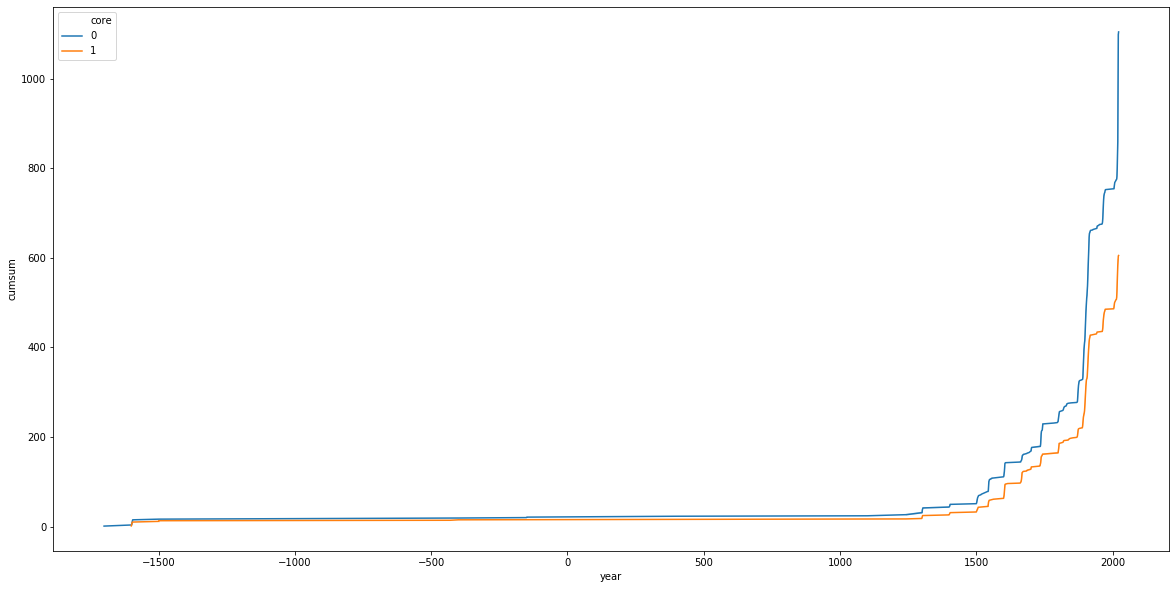

In [38]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='cumsum', hue='core', data=data)